# Calour microbiome databases interface tutorial

## Setup

In [1]:
import calour as ca

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ca.set_log_level(11)

In [3]:
%matplotlib notebook

## Load the data
We will use the Chronic faitigue syndrome data from:

Giloteaux, L., Goodrich, J.K., Walters, W.A., Levine, S.M., Ley, R.E. and Hanson, M.R., 2016.

Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome.

Microbiome, 4(1), p.30.

In [4]:
cfs=ca.read_amplicon('data/chronic-fatigue-syndrome.biom',
                     'data/chronic-fatigue-syndrome.sample.txt',
                     normalize=10000,min_reads=1000)

2019-04-18 14:16:27 INFO loaded 87 samples, 2129 features
2019-04-18 14:16:27 WARNING These have metadata but do not have data - dropped (1): {'ERR1331814'}
2019-04-18 14:16:27 INFO After filtering, 87 remaining


## preprocess
remove non-interesting bacteria, cluster bacteria and sort samples by disease status

In [5]:
cfs=cfs.filter_abundance(10)

2019-04-18 14:16:28 INFO After filtering, 1100 remaining


In [6]:
cfs=cfs.cluster_features()

2019-04-18 14:16:28 INFO After filtering, 1100 remaining


In [7]:
cfs=cfs.sort_samples('Subject')

## Viewing database annotations
in the interactive heatmap, when clicking on a bacteria, we get a list of all database results about the selected bacteria.

We can choose which databases to use by the `databases=['dbbact',...]` parameter. The possible databases depend on which database modules were installed.

Currently, supported microbiome database interfaces include:

* dbBact - a community database for manual annotations about bacteria (interface installation instruction at [dbbact-calour](https://github.com/amnona/dbbact-calour)).

* SpongeEMP - an automatic database for sea sponge samples (interface installation instruction at [spongeworld-calour](https://github.com/amnona/spongeworld-calour)).

* phenoDB - phenotypic information about selected bacteria (interface installation instruction at [pheno-calour](https://github.com/amnona/pheno-calour)).

By default, calour uses the dbBact database for microbiome data

<IPython.core.display.Javascript object>


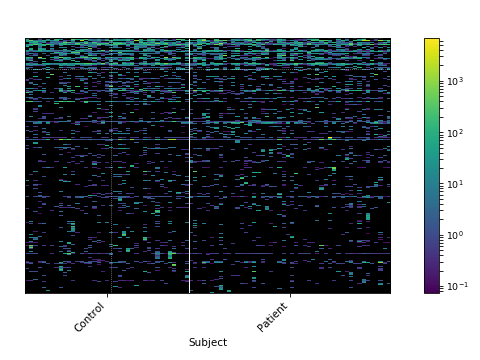

In [8]:
cfs.plot(sample_field='Subject',gui='jupyter')

## dbBact enrichment of selected bacteria
By selecting a set of bacteria (using the shift+click or ctrl+click) and choosing the "Enrichment" button, we can get a list of terms that are significantly enriched in the selected bacteria compared to the rest of the bacteria in the plot

## Adding dbBact annotations
(Only possible using the `gui='qt5'` GUI)

To add a new annotation to the selected set of bacteria, choose the "Annotate" button.

Detailed instructions are available at the dbBact.org website.

## Differential abundance
To find the bacteria significantly different between samples with 'Control' (healthy) and 'Patient' (sick) in the 'Subject' field.

In [9]:
dd=cfs.diff_abundance(field='Subject',val1='Control',val2='Patient', random_seed=2018)

2019-04-18 14:16:41 INFO 87 samples with both values
2019-04-18 14:16:41 INFO After filtering, 1100 remaining
2019-04-18 14:16:41 INFO 39 samples with value 1 (['Control'])
2019-04-18 14:16:41 INFO number of higher in Control: 38. number of higher in Patient : 16. total 54


### Plot the significant bacteria
When clicking on a bacteria, we'll get both dbBact, SpongeEMP, and phenoDB information

<IPython.core.display.Javascript object>


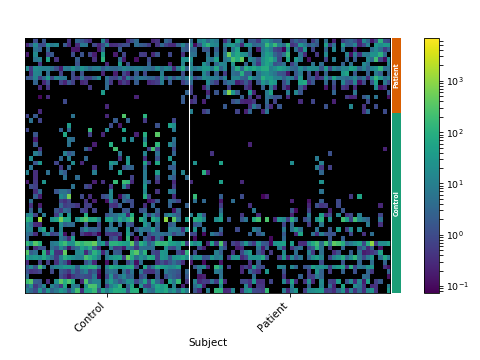

In [11]:
dd.plot(sample_field='Subject', gui='jupyter', databases=['dbbact','sponge'],bary_fields=['_calour_direction'])

## dbBact term enrichment (`diff_abundance_enrichment`)
We can ask what is special in the bacteria significanly higher in the Control vs. the Patient group and vice versa.

* Note since we need to get the per-feature annotations from dbBact, we need a live internet connection to run this command.

### Default parameters

2019-04-18 14:17:31 INFO Getting dbBact annotations for 54 sequences, please wait...
2019-04-18 14:17:40 INFO got 609 annotations
2019-04-18 14:17:40 INFO Got 4096 annotation-sequence pairs
2019-04-18 14:17:40 INFO Added annotation data to experiment. Total 609 annotations, 54 terms


<IPython.core.display.Javascript object>


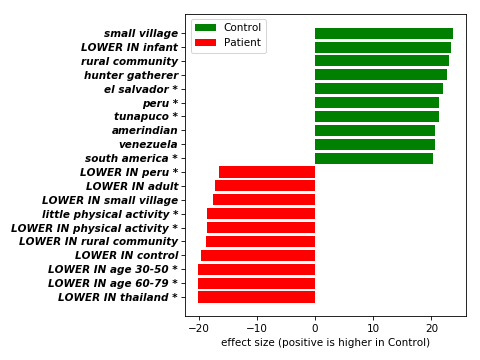

In [12]:
ax, enriched=dd.plot_diff_abundance_enrichment()

The enriched terms are in a calour experiment class (terms are features, bacteria are samples), so we can see the
list of enriched terms with the p-value (pval) and effect size (odif)

In [13]:
enriched.feature_metadata

,num_enriched_exps,num_total_exps,odif,pvals,term
LOWER IN thailand *,-1.0,-1.0,-20.072368,0.000999,LOWER IN thailand *
LOWER IN age 60-79 *,-1.0,-1.0,-20.027961,0.000999,LOWER IN age 60-79 *
LOWER IN age 30-50 *,-1.0,-1.0,-20.027961,0.000999,LOWER IN age 30-50 *
LOWER IN control,-1.0,-1.0,-19.583882,0.000999,LOWER IN control
LOWER IN rural community,-1.0,-1.0,-18.740132,0.000999,LOWER IN rural community
LOWER IN physical activity *,-1.0,-1.0,-18.562500,0.000999,LOWER IN physical activity *
little physical activity *,-1.0,-1.0,-18.562500,0.000999,little physical activity *
LOWER IN small village,-1.0,-1.0,-17.452303,0.000999,LOWER IN small village
LOWER IN adult,-1.0,-1.0,-17.185855,0.001998,LOWER IN adult
LOWER IN peru *,-1.0,-1.0,-16.430921,0.000999,LOWER IN peru *


We can plot the enriched terms heatmap to see the term scores for each bacteria.

Note now rows are the bacteria and columns are the terms

<IPython.core.display.Javascript object>


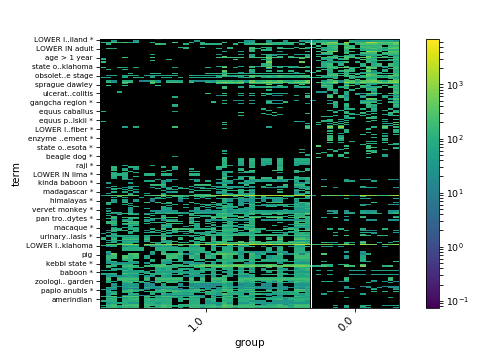

In [14]:
enriched.plot(gui='jupyter', databases=[], feature_field='term',sample_field='group',
              yticklabel_kwargs={'rotation': 0, 'size': 7})

## Look at the behavior of a single term
We want to see all the annotations where a given term appears, and see what bacteria from either group (CFS or healthy) appear in that annotations.
To do this, we use dbbact.show_term_details_diff(). The output of this function is an experiment where each COLUMN is a bacteria, and each row is an annotation. We see whether each bacteria appears in the annotation. Color indicates the annotation type.

In [15]:
dbbact=ca.database._get_database_class('dbbact')

2019-04-18 14:18:02 WARNING Do you forget to normalize your data? It is required before running this function
2019-04-18 14:18:02 INFO After filtering, 12 remaining


<IPython.core.display.Javascript object>


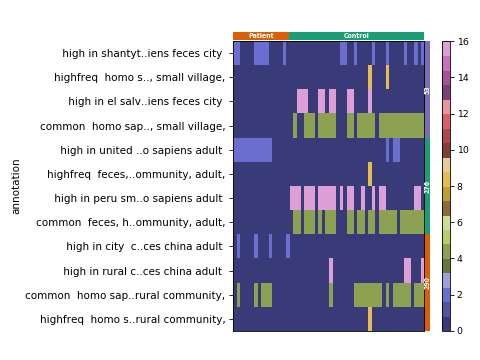

In [16]:
term_info_exp = dbbact.show_term_details_diff('small village',dd,gui='jupyter')

### getting enriched annotations instead of terms
Each annotation is coming from a single experiment (as opposed to terms that can come from annotations in multiple experiment)

<IPython.core.display.Javascript object>


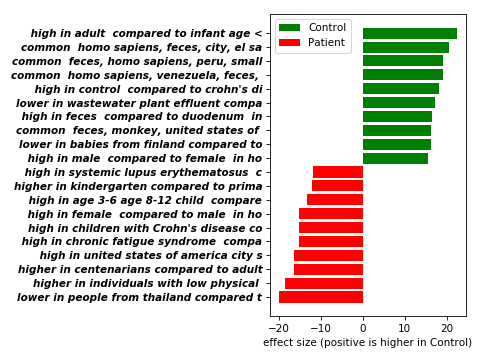

In [17]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='annotation')

In [18]:
enriched.feature_metadata

,num_enriched_exps,num_total_exps,odif,pvals,term
lower in people from thailand compared to 2nd generation immigrants to usa ( high in united states of america compared to thailand rural community in homo sapiens feces,-1.0,-1.0,-20.072368,0.000999,lower in people from thailand compared to 2nd ...
higher in individuals with low physical activity ( high in little physical activity compared to physical activity in homo sapiens feces united states of america,-1.0,-1.0,-18.562500,0.000999,higher in individuals with low physical activi...
higher in centenarians compared to adults ( high in age >94 compared to age 30-50 age 60-79 in homo sapiens feces china,-1.0,-1.0,-16.430921,0.000999,higher in centenarians compared to adults ( hi...
high in united states of america city state of oklahoma compared to peru small village tunapuco rural community in feces homo sapiens adult,-1.0,-1.0,-16.430921,0.001998,high in united states of america city state o...
high in chronic fatigue syndrome compared to control in homo sapiens feces new york county,-1.0,-1.0,-15.187500,0.000999,high in chronic fatigue syndrome compared to...
high in children with Crohn's disease compared to healthy adult controls ( high in crohn's disease obsolete_juvenile stage child compared to control adult in homo sapiens feces glasgow,-1.0,-1.0,-15.187500,0.000999,high in children with Crohn's disease compared...
high in female compared to male in homo sapiens feces united states of america,-1.0,-1.0,-15.187500,0.000999,high in female compared to male in homo sap...
high in age 3-6 age 8-12 child compared to adult age 30-50 age 60-79 in homo sapiens feces china,-1.0,-1.0,-13.322368,0.000999,high in age 3-6 age 8-12 child compared to a...
higher in kindergarten compared to primary and middle school kids ( high in age 3-6 compared to age 8-12 age 13-14 in homo sapiens feces china,-1.0,-1.0,-12.078947,0.002997,higher in kindergarten compared to primary and...
high in systemic lupus erythematosus compared to control in feces homo sapiens commonwealth of virginia united states of america adult,-1.0,-1.0,-11.812500,0.000999,high in systemic lupus erythematosus compare...


### Getting both enriched terms and annotations

<IPython.core.display.Javascript object>


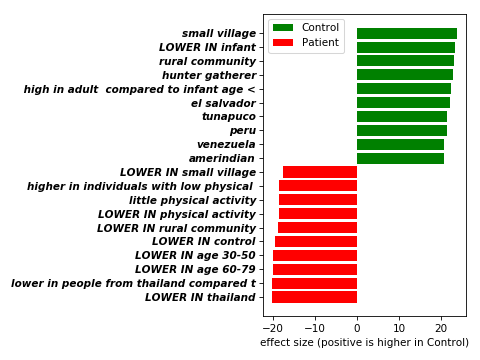

In [19]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined')

In [20]:
enriched.feature_metadata

,num_enriched_exps,num_total_exps,odif,pvals,term
LOWER IN thailand,-1.0,-1.0,-20.072368,0.000999,LOWER IN thailand
lower in people from thailand compared to 2nd generation immigrants to usa ( high in united states of america compared to thailand rural community in homo sapiens feces,-1.0,-1.0,-20.072368,0.000999,lower in people from thailand compared to 2nd ...
LOWER IN age 60-79,-1.0,-1.0,-20.027961,0.000999,LOWER IN age 60-79
LOWER IN age 30-50,-1.0,-1.0,-20.027961,0.000999,LOWER IN age 30-50
LOWER IN control,-1.0,-1.0,-19.583882,0.000999,LOWER IN control
LOWER IN rural community,-1.0,-1.0,-18.740132,0.000999,LOWER IN rural community
LOWER IN physical activity,-1.0,-1.0,-18.562500,0.000999,LOWER IN physical activity
little physical activity,-1.0,-1.0,-18.562500,0.000999,little physical activity
higher in individuals with low physical activity ( high in little physical activity compared to physical activity in homo sapiens feces united states of america,-1.0,-1.0,-18.562500,0.000999,higher in individuals with low physical activi...
LOWER IN small village,-1.0,-1.0,-17.452303,0.000999,LOWER IN small village


### Ignoring selected experiments already in dbBact
If our experiment is already in dbBact, or if there are other experiments in dbBact we do not want to include in the enrichment analysis, we can specify them using the `ignore_exp=[expID,...]` parameter.

In our case, the cfs experiment is already added to dbBact, so let's ignore it's annotations when doing the analysis. By looking at [dbBact.org](http://dbbact.org/main) we know its experimentID is 12. Alternatively we can use `ignore_exp=True` to automatically detect the current experimentID if it exists in dbBact (using the data and mapping file md5 hash).

<IPython.core.display.Javascript object>


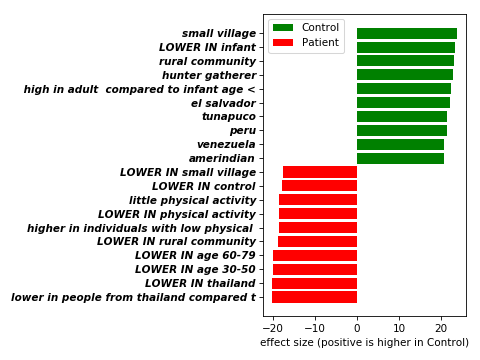

In [21]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined', ignore_exp=[12])

## Adding common dbBact terms to features (`add_terms_to_features`)
We can attach to each bacteria the most common dbBact term associated with it.

The terms are selected from all of the dbBact terms, or can be selected from a supplied list.

In [22]:
cfs=cfs.add_terms_to_features(dbname='dbbact',use_term_list=['feces','saliva','skin','mus musculus'])

2019-04-18 14:18:37 INFO Getting dbBact annotations for 1100 sequences, please wait...
2019-04-18 14:18:51 INFO got 2263 annotations
2019-04-18 14:18:51 INFO Got 41933 annotation-sequence pairs
2019-04-18 14:18:51 INFO Added annotation data to experiment. Total 2263 annotations, 1100 terms


In [23]:
tt=cfs.sort_by_metadata('common_term',axis='feature')

<IPython.core.display.Javascript object>


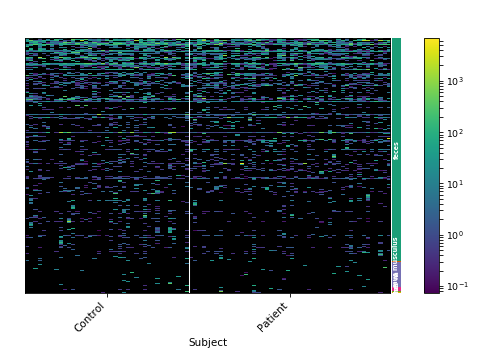

In [25]:
tt.plot(sample_field='Subject', bary_fields=['common_term'], gui='jupyter')

## Get enriched terms using all bacteria

Instead of just comparing the bacteria enriched in the two groups (and then comparing terms between them), we can do a weighted term average for each group using all bacteria (weighing the terms of each bacteria by its' frequency in the sample). This can work if we don't have a strong set of bacteria separating between the two groups.

In [26]:
dbbact=ca.database._get_database_class('dbbact')

In [27]:
enriched=dbbact.sample_enrichment(cfs,'Subject','Control','Patient',
                                  term_type='combined',ignore_exp=[12])

2019-04-18 14:19:31 INFO 87 samples with both values
2019-04-18 14:19:31 WARNING Do you forget to normalize your data? It is required before running this function
2019-04-18 14:19:31 INFO After filtering, 4365 remaining
2019-04-18 14:19:31 INFO 39 samples with value 1 (['Control'])
2019-04-18 14:19:34 INFO number of higher in Control: 831. number of higher in Patient : 119. total 950


In [28]:
enriched.feature_metadata

,term,num_features,_calour_stat,_calour_pval,_calour_direction
enzyme supplement,enzyme supplement,20,-1.467864,0.000999,Patient
-non c. diff diarrhea,-non c. diff diarrhea,13,-1.467470,0.000999,Patient
higher in patients with c. diff diarrhea compared to non-c. diff diarrhea ( high in clostridium difficile intestinal infectious disease compared to non c. diff diarrhea in homo sapiens feces australia hospital diarrhea,higher in patients with c. diff diarrhea compa...,13,-1.467470,0.000999,Patient
higher in antibiotics treated rats compared to controls ( high in antibiotic neomycin ampicillin compared to control in rat rattus norvegicus sprague dawley feces caecum research facility switzerland,higher in antibiotics treated rats compared to...,21,-1.311713,0.000999,Patient
neomycin,neomycin,21,-1.294715,0.000999,Patient
-no enzyme supplement,-no enzyme supplement,20,-1.252388,0.000999,Patient
high in EPI dogs with enzyme supplement compared to no supplement ( high in enzyme supplement compared to no enzyme supplement in canis lupus familiaris dog feces united states of america exocrine pancreatic insufficiency,high in EPI dogs with enzyme supplement compar...,20,-1.252388,0.000999,Patient
high in children with Crohn's disease compared to healthy adult controls ( high in crohn's disease obsolete_juvenile stage child compared to control adult in homo sapiens feces glasgow,high in children with Crohn's disease compared...,47,-1.188369,0.000999,Patient
high in schizophrenia compared to control in homo sapiens feces adult united states of america,high in schizophrenia compared to control i...,13,-1.031583,0.000999,Patient
-gastric bypass,-gastric bypass,4,-1.009475,0.000999,Patient
